In [1]:
#importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import dill as pickle

#for quick test
from statsmodels.formula.api import ols
from scipy import stats

#encoding and more stuff
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, normalize, scale

#feature selection
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# EDA (Eplanatory Data Analysis), first iteration


In [2]:
#function to analyse the dataset
def info(df):
    print('info')
    print(df.info())
    print('------------')
    print('describe')
    print(df.describe())
    print('------------')
    print('nunique')
    print(df.nunique())
    print('------------')
    print('sum of nan')
    print(df.isnull().sum())

#function to print all unique value to have a look
def uninfo(df):
    for i in df:
        uni =df[i].unique()
        print(i)
        print(uni)
        print('-----------------')

In [3]:
#reading the file
file = pd.read_csv("data/data.csv", delimiter=",")

In [4]:
#from the project, the target is the median_house_value
file

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [5]:
#first overall look
# we can see that all the Nans are in the total_bedrooms column
#there is 1 categorial column (ocea_proximity) containing 5 object values
#unnamed: 0 is composed of int values, it looks like an PRIMARY KEY
print('----------------')
info(file)
print('----------------')
uninfo(file)

----------------
info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB
None
------------
describe
         Unnamed: 0     longitude      latitude  housing_median_age  \
count  16512.000000  16512.000000  16512.000000        16512.000000   
m

In [6]:
#calculate the % of missing values in the dataset
def percent_nan(data):   
    nan_sum = data.isnull().sum()
    total_cells = np.product(file.shape)
    total_missing = nan_sum.sum()
    percent_missing = (total_missing/total_cells) * 100
    print(percent_missing)

In [7]:
percent_nan(file)

0.09689922480620156


<AxesSubplot:>

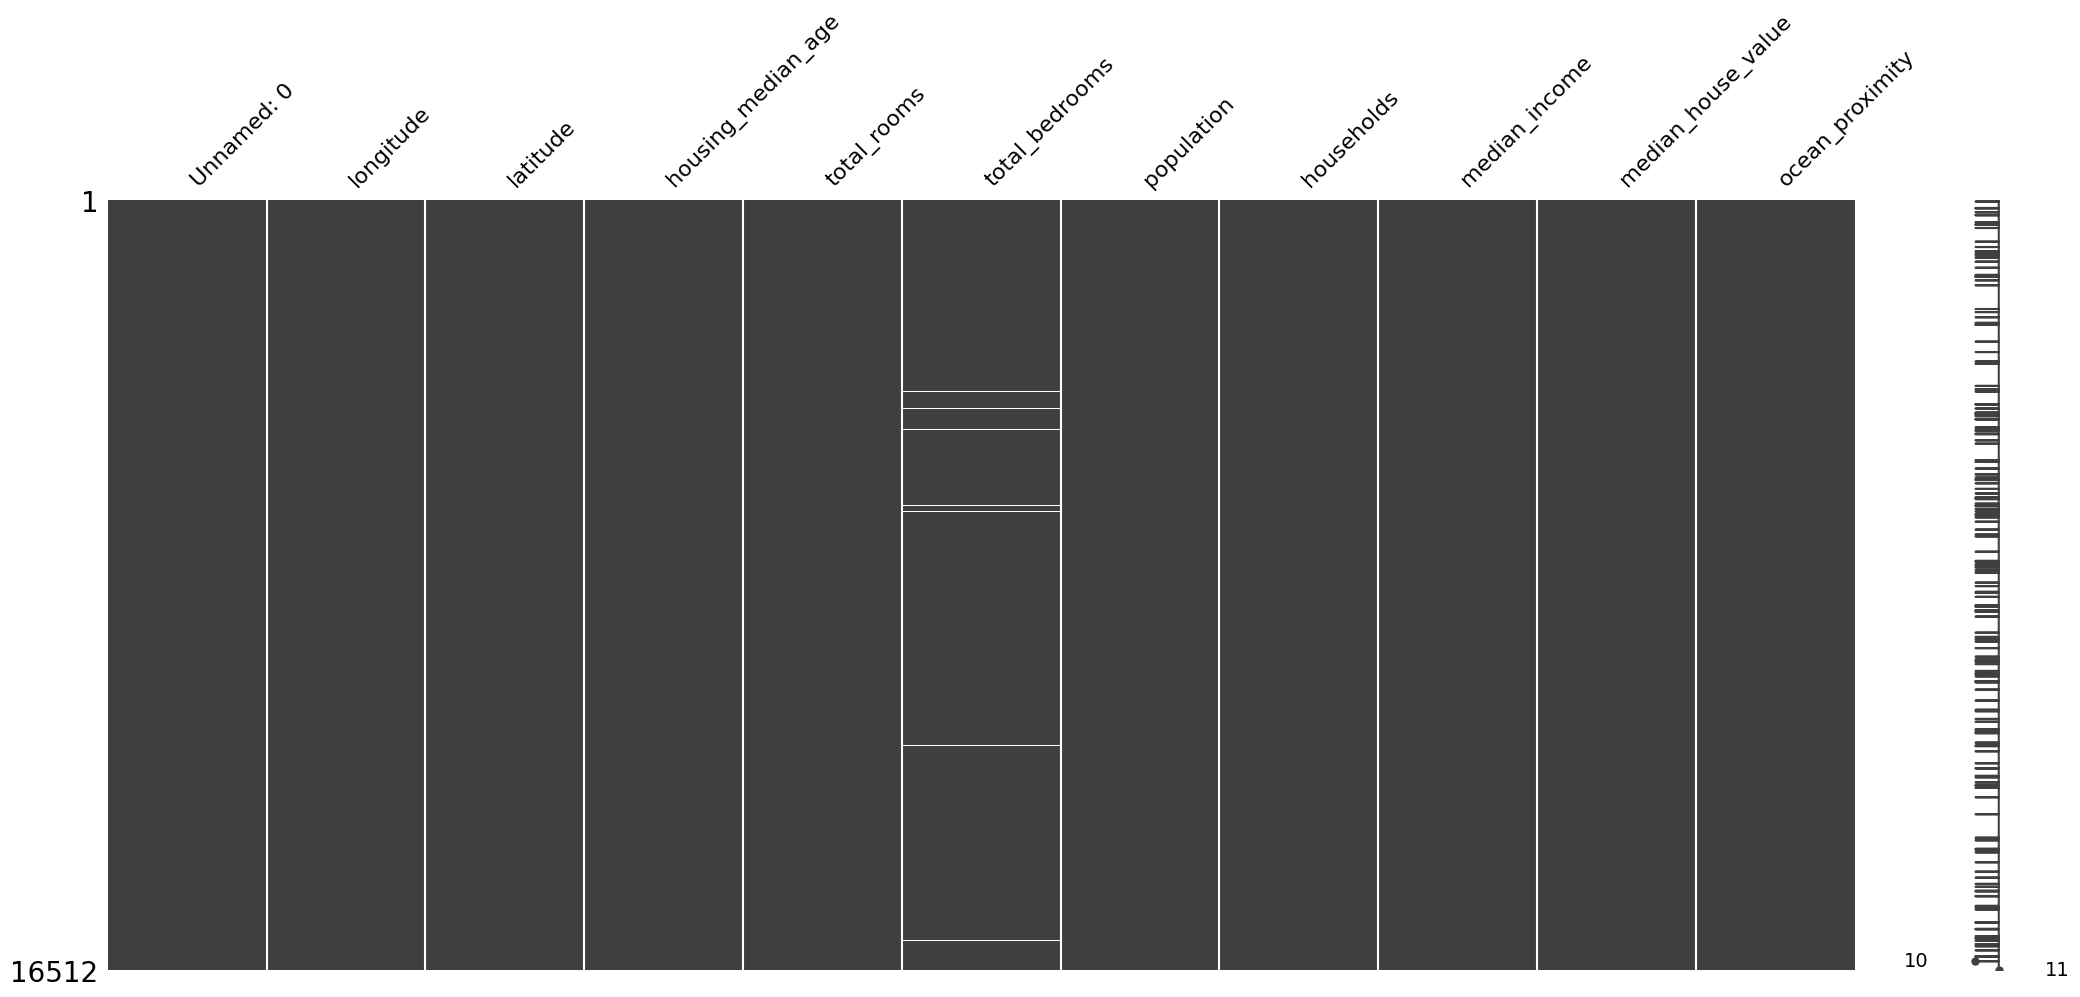

In [8]:
#using missingno to have a more visual look
mno.matrix(file)

In [9]:
#creating a df of nan to see if there is a pattern in the data (doesn't looks like it)
file_nan = file[file.isna().any(axis=1)]
file_nan

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
33,5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0,<1H OCEAN
171,2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,98100.0,NEAR OCEAN
178,10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,105200.0,INLAND
179,19485,-120.98,37.66,10.0,934.0,NaN,401.0,255.0,0.9336,127100.0,INLAND
259,19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16002,17202,-119.73,34.44,38.0,1729.0,NaN,801.0,395.0,3.1364,357500.0,NEAR OCEAN
16089,17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,405000.0,NEAR OCEAN
16214,4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,162500.0,<1H OCEAN
16228,9942,-122.23,38.17,45.0,350.0,NaN,225.0,72.0,1.8942,216700.0,NEAR BAY


In [10]:
#checking duplicates
file.duplicated().sum()

0

In [11]:
#looking at the Unnamed column, it looks like it's the id for the blocs
test = file['Unnamed: 0']
truc = test.to_frame()
truc.sort_values(by=('Unnamed: 0'))

,Unnamed: 0
4569,0
276,2
7490,3
705,5
9496,6
...,...
734,20635
14840,20636
9901,20637
12100,20638


In [12]:
# renaming for better manipulation
# or not
# iter1 = file.rename(columns={"Unnamed: 0": "bloc_id"})
iter1 = file.copy()

In [13]:
#basic encoding to run tests and models, i will upgrade it later
#or not
#iter1['ocean_proximity'] = iter1['ocean_proximity'].replace({'INLAND': 0,'<1H OCEAN': 1,'NEAR OCEAN': 2,'NEAR BAY': 3,'ISLAND': 4})

In [14]:
export_iter1 = pd.to_pickle(iter1, "data/iter1.pkl")
export_iter1

# Second iteration - fillna with 0

In [15]:
#i am ensure to drop the Nan so i will replace it 
#with the thought that the total_bedrooms with Nan are offices or function building
#also the linearregression doesn't accept Nans so for all the future iteration, i will always fill it
iter2 = iter1.fillna(0)

In [16]:
#first raw dataframe that i will work on
iter2

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [17]:
#making a df without categorial feature
iter2_nocean = iter2.drop('ocean_proximity',axis=1)

### univariate analysis 

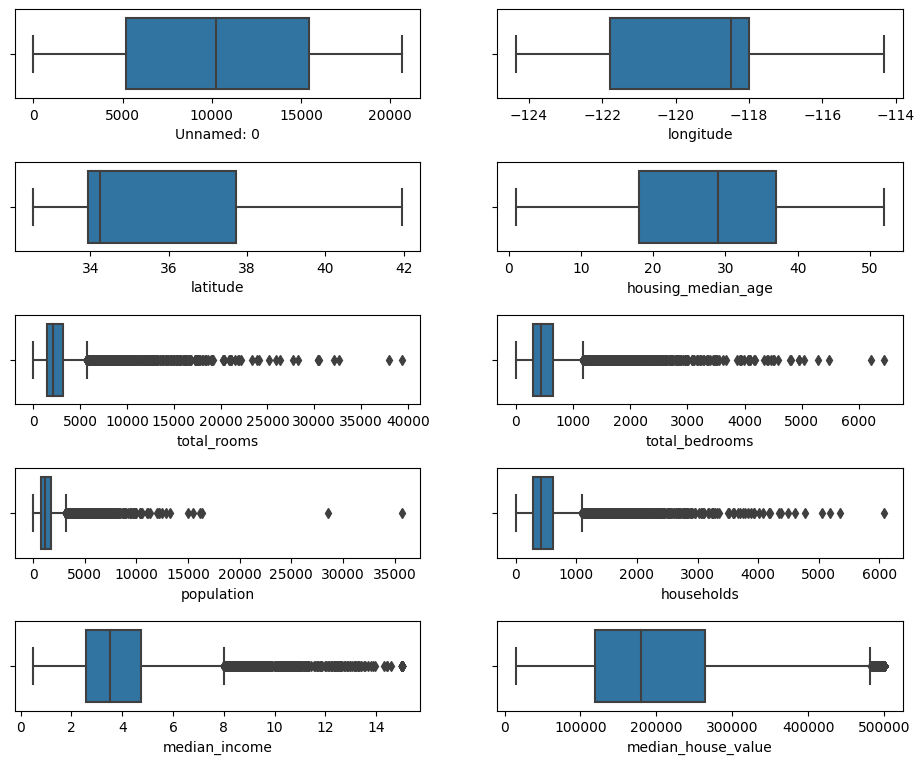

In [18]:
#individual boxplot
fig, axs = plt.subplots(5, 2, figsize=(10,8))
axs = axs.flatten()
fig.tight_layout(pad=2.5)
for i, col in enumerate(iter2_nocean.columns):
    sns.boxplot(iter2_nocean[col], ax=axs[i])

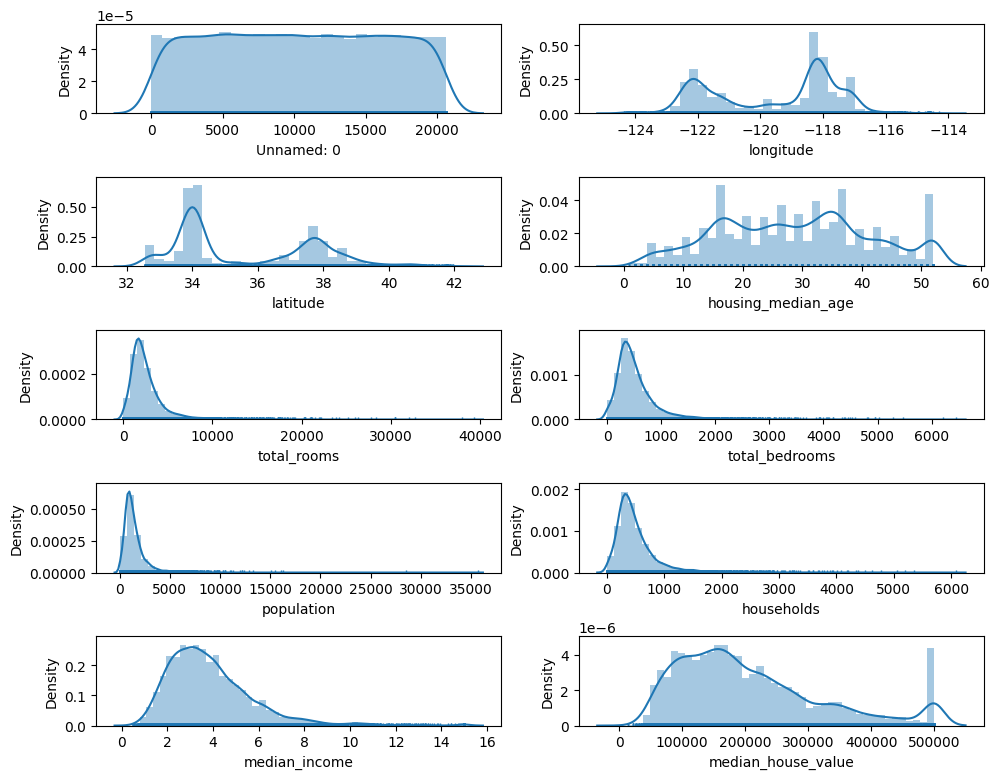

In [19]:
#individual distplot
fig, axs = plt.subplots(5, 2, figsize=(10,8))
axs = axs.flatten()
fig.tight_layout(pad=2.5)
for i, col in enumerate(iter2_nocean.columns):
    sns.distplot(iter2_nocean[col],rug=True, ax=axs[i])

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

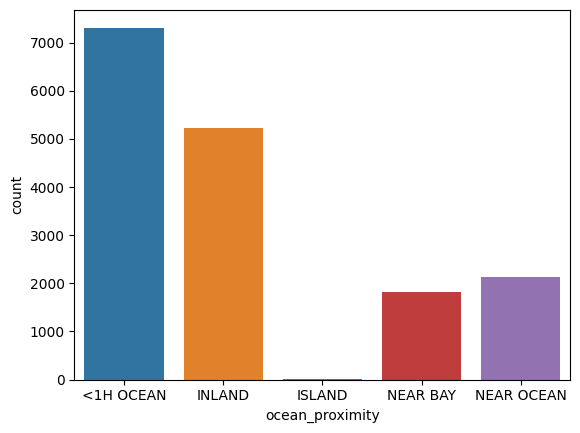

In [20]:
#countplot for the ocean proximity
sns.countplot(x=iter2["ocean_proximity"].sort_values())

<AxesSubplot:xlabel='ocean_proximity'>

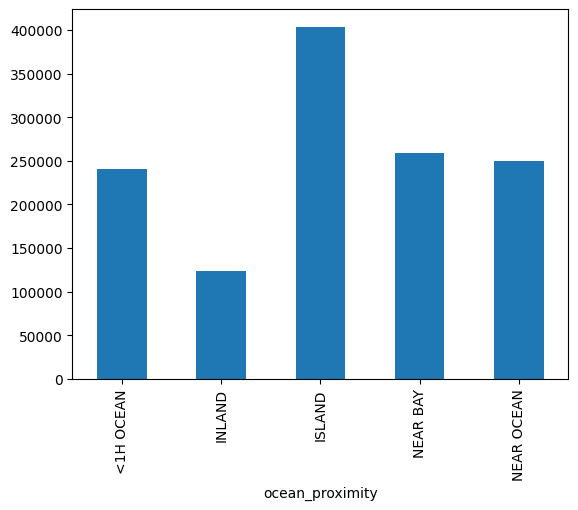

In [21]:
#comparing the mean of median_house_value of each categories
#there is not many island proximity compared to how much they cost
iter2.groupby('ocean_proximity')['median_house_value'].mean().plot.bar()

In [22]:
export_iter2 = pd.to_pickle(iter2, "data/iter2.pkl")
export_iter2

# third iteration - fillna, no outliers

In [23]:
#i will rerun all the steps before without the outliers
iter3 = iter2.copy()

In [24]:
#finding the upper fence value of the boxplots with a function
def outliers_finder(data,columns):
    lower = []
    upper = []
    nl = '\n'
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        Lower_Fence = Q1 - (1.5 * IQR)
        Upper_Fence = Q3 + (1.5 * IQR)
        lower.append(Lower_Fence)
        upper.append(Upper_Fence)
    return print(f"lower fence {lower}{nl}upper fence {upper}")

In [25]:
#list of outliers threshold
outliers_finder(iter3,['total_rooms','total_bedrooms','population','households','median_income','median_house_value'])

lower fence [-1116.0, -236.0, -637.0, -209.0, -0.6935875, -98250.0]
upper fence [5716.0, 1172.0, 3163.0, 1095.0, 7.9893125000000005, 482150.0]


In [26]:
#defining the columns i will change with the threshold
out_col = ['total_rooms','total_bedrooms','population','households','median_income','median_house_value']
upper = [5716.0, 1173.5, 3163.0, 1095.0, 7.9893125000000005, 482150.0]

In [27]:
#zipping out the outliers
for i,u in zip(out_col,upper):
    iter3  = iter3 [iter3 [i] <= u]

In [28]:
#i lost 2417 rows from this operation
iter3.shape

(14095, 11)

In [29]:
#removing ocean_proximity and house_median_age because i can't plot it otherwise
iter3_nocean = iter3.drop(['ocean_proximity'],axis=1)

In [30]:
iter3_nocean

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0
...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0


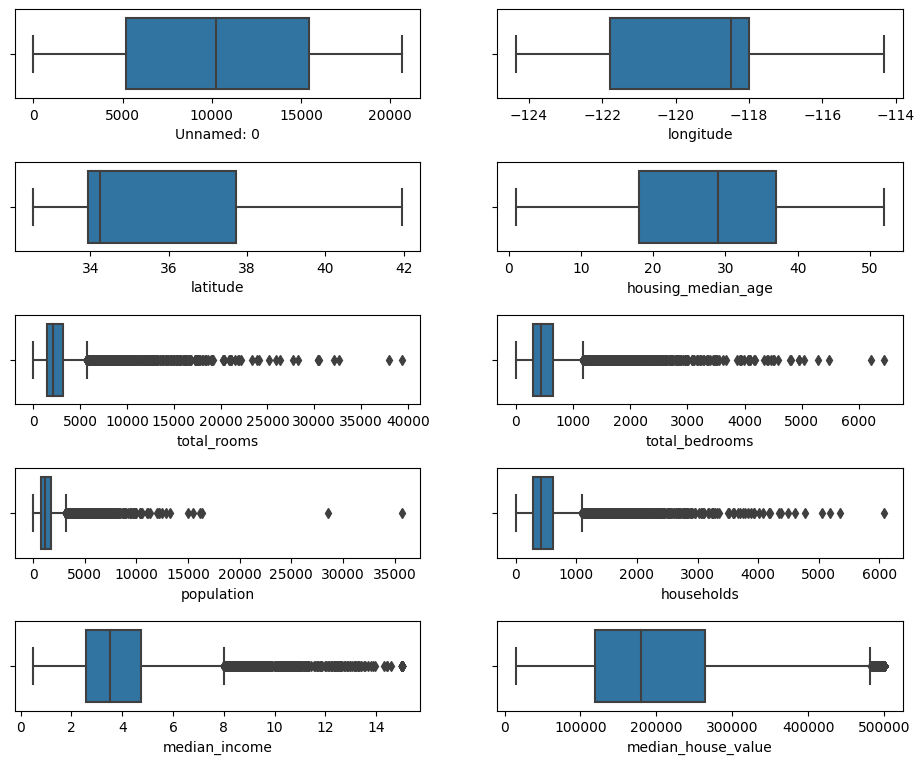

In [31]:
#univariate analisys of the new df
fig, axs = plt.subplots(5, 2, figsize=(10,8))
axs = axs.flatten()
fig.tight_layout(pad=2.5)
for i, col in enumerate(iter3_nocean.columns):
    sns.boxplot(iter2_nocean[col], ax=axs[i])

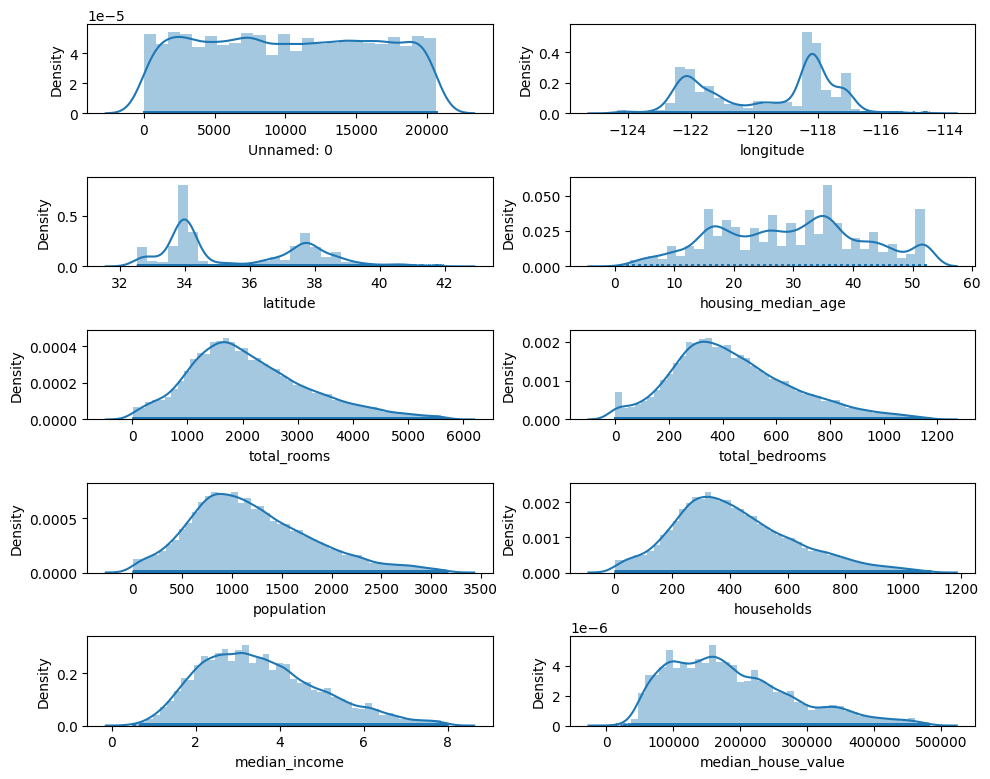

In [32]:
fig, axs = plt.subplots(5, 2, figsize=(10,8))
axs = axs.flatten()
fig.tight_layout(pad=2.5)
for i, col in enumerate(iter3_nocean.columns):
    sns.distplot(iter3_nocean[col],rug=True, ax=axs[i])

In [33]:
#quick bivariate analysis to see patterns of correlation
#not much information except that we can see california with the latitude and longitude
#there is a high negative correlation with longitude and ltatitude (since it's GPS data)
#housing_median_age affects nearly everything negatively (maybe because the older the housing, the less atractive it is)
#with the target, we can see clearly that it's not really correlated with anything except a little by median_income
#median_house_value (the target) has some correlation with median_income (since the more you earn, the more you spend maybe)
#total_bedrooms is highly correlated to total_rooms (which makes sense)

#sns.pairplot(data=iter3)

In [34]:
iter3

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [35]:
export_iter3 = pd.to_pickle(iter3, "data/iter3.pkl")
export_iter3

# fourth iteration - fill median

In [36]:
#iter4 will be by filling using median
iter4 = iter1.fillna(iter1['total_bedrooms'].median())

In [37]:
export_iter4 = pd.to_pickle(iter4, "data/iter4.pkl")
export_iter4

# fifth iteration - fill median, no outlier

In [38]:
iter5 = iter4.copy()
iter5.shape

(16512, 11)

In [39]:
#found another way to delete outliers faster
def out_lier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data_out

In [40]:
out_lier(iter5).shape

(14088, 11)

In [41]:
iter5 = out_lier(iter5)

In [42]:
export_iter5 = pd.to_pickle(iter5, "data/iter5.pkl")
export_iter5

# sixth iteration - fill mean

In [43]:
#iter4 will be by filling using median
iter6 = iter1.fillna(iter1['total_bedrooms'].mean())

In [44]:
export_iter6 = pd.to_pickle(iter6, "data/iter6.pkl")
export_iter6

# seventh iteration - fill mean, no outlier

In [45]:
iter7 = iter6.copy()
iter7.shape

(16512, 11)

In [46]:
out_lier(iter7).shape

(14088, 11)

In [47]:
iter7 = out_lier(iter7)

In [48]:
export_iter7 = pd.to_pickle(iter7, "data/iter7.pkl")
export_iter7

# eight iteration - encoding

if i did every iterations like i did before it would take too long, so now i continue using 2 choice by iterations
after talking with my classmates, i should've done outliers/no outliers, then try to fill it, it would've reduced my iterations
i will use the 6th iteration (fillmean)

In [49]:
#encoding ocean proximity
encoder = OneHotEncoder()
ocean_proximity_1hot = encoder.fit_transform(iter6[['ocean_proximity']])
ocean_proximity_1hot = ocean_proximity_1hot.toarray()
ocean_proximity_df = pd.DataFrame(ocean_proximity_1hot, columns=encoder.get_feature_names(['ocean_proximity']))
iter8 = pd.concat([iter6, ocean_proximity_df], axis=1)
iter8 = iter8.drop(['ocean_proximity'], axis=1)

In [50]:
iter8

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0.0,1.0,0.0,0.0,0.0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0,0.0,0.0,0.0,0.0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0.0,1.0,0.0,0.0,0.0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0,0.0,0.0,0.0,0.0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0.0,1.0,0.0,0.0,0.0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0.0,0.0,0.0,1.0,0.0
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0.0,1.0,0.0,0.0,0.0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0,0.0,0.0,0.0,0.0


In [51]:
export_iter8 = pd.to_pickle(iter8, "data/iter8.pkl")
export_iter8

# ninth iteration - discretizing, house_median_age

In [52]:
iter9 = iter8.copy()

In [53]:
iter9['binned_age']=pd.cut(iter9['housing_median_age'],
                        bins = [0,10,20,30,40,50,np.inf], 
                        labels = ['[0-10]','[10-20]','[20-30]','[30-40]','[40-50]','[50+]'])

In [54]:
iter9 = iter9.drop(['housing_median_age'],axis=1)

In [55]:
iter9

,Unnamed: 0,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,binned_age
0,2072,-119.84,36.77,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0.0,1.0,0.0,0.0,0.0,[0-10]
1,10600,-117.80,33.68,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0,0.0,0.0,0.0,0.0,[0-10]
2,2494,-120.19,36.60,875.0,214.0,931.0,214.0,1.5536,58300.0,0.0,1.0,0.0,0.0,0.0,[20-30]
3,4284,-118.32,34.10,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0,0.0,0.0,0.0,0.0,[30-40]
4,16541,-121.23,37.79,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0.0,1.0,0.0,0.0,0.0,[20-30]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,1465.0,278.0,745.0,250.0,3.0625,93800.0,0.0,1.0,0.0,0.0,0.0,[10-20]
16508,18898,-122.25,38.11,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0.0,0.0,0.0,1.0,0.0,[40-50]
16509,11798,-121.22,38.92,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0.0,1.0,0.0,0.0,0.0,[10-20]
16510,6637,-118.14,34.16,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0,0.0,0.0,0.0,0.0,[30-40]


In [56]:
export_iter9 = pd.to_pickle(iter9, "data/iter9.pkl")
export_iter9

# tenth iteration - encoding discretized house_median_age

In [57]:
#i couldn't run the 9th iteration so i will try to encode it so it will run the model
#making a function of the encoder in case i need it later
def encoder(data,target):
    encoder = OneHotEncoder()
    target_1hot = encoder.fit_transform(data[[target]])
    target_1hot = target_1hot.toarray()
    target_df = pd.DataFrame(target_1hot, columns=encoder.get_feature_names([target]))
    binned_data = pd.concat([data, target_df], axis=1)
    binned_data = binned_data.drop([target], axis=1)
    return binned_data

In [58]:
iter10 = encoder(iter9,"binned_age")

In [59]:
iter10

,Unnamed: 0,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,binned_age_[0-10],binned_age_[10-20],binned_age_[20-30],binned_age_[30-40],binned_age_[40-50],binned_age_[50+]
0,2072,-119.84,36.77,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10600,-117.80,33.68,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2494,-120.19,36.60,875.0,214.0,931.0,214.0,1.5536,58300.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4284,-118.32,34.10,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,16541,-121.23,37.79,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,1465.0,278.0,745.0,250.0,3.0625,93800.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16508,18898,-122.25,38.11,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16509,11798,-121.22,38.92,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16510,6637,-118.14,34.16,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
export_iter10 = pd.to_pickle(iter10, "data/iter10.pkl")
export_iter10

# eleventh iteration - scaling using standard scaler

In [61]:
iter11 = iter10.copy()

In [62]:
scaler = StandardScaler()
no_scale = iter11.columns.difference(["median_house_value","longitude","latitude","bloc_id","ocean_proximity_0","ocean_proximity_1","ocean_proximity_2","ocean_proximity_3","ocean_proximity_4","binned_age_[0-10]","binned_age_[10-20]","binned_age_[20-30]","binned_age_[30-40]","binned_age_[40-50]","binned_age_[50+]"])
iter11[no_scale] = scaler.fit_transform(iter11[no_scale])

In [63]:
export_iter11 = pd.to_pickle(iter11, "data/iter11.pkl")
export_iter11

# twelth iteration - scaling using robust scaler

In [64]:
iter12 = iter10.copy()

In [65]:
#the score worsened by scaling (only a very tiny bit)
#after research, strandard scaler is bad with outliers, robustscaler is better
scaler = RobustScaler()
no_scale = iter12.columns.difference(["median_house_value","longitude","latitude","bloc_id","ocean_proximity_0","ocean_proximity_1","ocean_proximity_2","ocean_proximity_3","ocean_proximity_4","binned_age_[0-10]","binned_age_[10-20]","binned_age_[20-30]","binned_age_[30-40]","binned_age_[40-50]","binned_age_[50+]"])
iter12[no_scale] = scaler.fit_transform(iter12[no_scale])

In [66]:
export_iter12 = pd.to_pickle(iter12, "data/iter12.pkl")
export_iter12

# thirteenth iteration - normalizing

In [67]:
iter13 = iter10.copy()

In [68]:
no_norm = iter13.columns.difference(["median_house_value","longitude","latitude","bloc_id","ocean_proximity_0","ocean_proximity_1","ocean_proximity_2","ocean_proximity_3","ocean_proximity_4","binned_age_[0-10]","binned_age_[10-20]","binned_age_[20-30]","binned_age_[30-40]","binned_age_[40-50]","binned_age_[50+]"])
iter13[no_norm] = normalize(iter13[no_norm])

In [69]:
export_iter13 = pd.to_pickle(iter13, "data/iter13.pkl")
export_iter13

# fourtheenth iteration - logarithmic scaling (UNFINISHED)

In [70]:
iter14 = iter10.copy()

In [71]:
no_scale = iter12.columns.difference(["median_house_value","longitude","latitude","bloc_id","ocean_proximity_0","ocean_proximity_1","ocean_proximity_2","ocean_proximity_3","ocean_proximity_4","binned_age_[0-10]","binned_age_[10-20]","binned_age_[20-30]","binned_age_[30-40]","binned_age_[40-50]","binned_age_[50+]"])
iter12[no_scale] = scaler.fit_transform(iter12[no_scale])

In [72]:
export_iter14 = pd.to_pickle(iter12, "data/iter14.pkl")
export_iter14

# pipeline

In [81]:
def cleaning(data):
    #imputation
    col_nan = data.columns[data.isna().any(0)]
    for i in col_nan:
        data = data.fillna(data[i].mean())
    #discretizing
    data['binned_age']=pd.cut(data['housing_median_age'],
                              bins = [0,10,20,30,40,50,np.inf], 
                              labels = ['[0-10]','[10-20]','[20-30]','[30-40]','[40-50]','[50+]'])
    data = data.drop(['housing_median_age'],axis=1)
    #encoding
    col_qual = data.select_dtypes(exclude=[np.number])
    col_qual = col_qual.columns
    for i in col_qual:
        encoder = OneHotEncoder()
        onehot = encoder.fit_transform(data[[i]])
        onehot = onehot.toarray()
        onehot_df = pd.DataFrame(onehot, columns=encoder.get_feature_names_out([i]))
        data = pd.concat([data,onehot_df], axis=1)
    for i in col_qual:
        data = data.drop([i],axis=1)
    return data

In [82]:
with open('cleaning.pkl', 'wb') as file:
    pickle.dump(cleaning,file)